In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

In [7]:
def no_of_sources(size,survey_size,survey_sources):
    size = size/60
    square = size**2
    source_density = survey_sources/survey_size #number of sources per square degree
    return source_density*square #find the 

mu_first = no_of_sources(2.5,10575,0.946432*10**6)
mu_vlass = no_of_sources(2.5,30000,5*10**6)
mu_ska = no_of_sources(2.5,30000,70*10**6)

print (mu_first)
print (mu_vlass)
print (mu_ska)

0.15537693722090887
0.2893518518518518
4.050925925925926


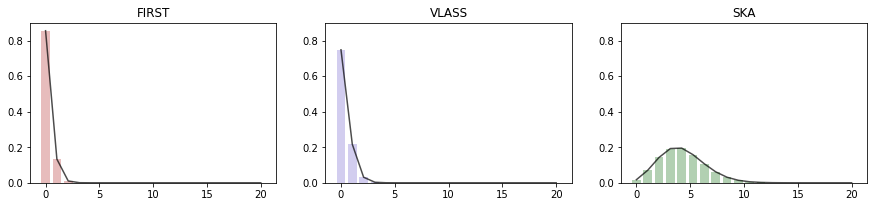

In [8]:
def poisson(mu,n):
    distribution = np.empty(n)
    for i in range(n):
        dist = (np.exp(-mu)*mu**i)/math.factorial(i)
        distribution[i] = dist
    return distribution

m = 20
first = poisson(mu_first,m)
vlass = poisson(mu_vlass,m)
ska = poisson(mu_ska,m)

n = np.linspace(0,m,m)

plt.figure(figsize=(15,10))

plt.subplot(331)
plt.title('FIRST')
plt.bar(n, first,color='firebrick',alpha=0.3)
plt.plot(n, first,'-',color='black',alpha=0.7)
plt.ylim(0,0.9)

plt.subplot(332)
plt.title('VLASS')
plt.bar(n, vlass,color='slateblue',alpha=0.3)
plt.plot(n, vlass,'-',color='black',alpha=0.7)
plt.ylim(0,0.9)

plt.subplot(333)
plt.title('SKA')
plt.bar(n, ska,color='darkgreen',alpha=0.3)
plt.plot(n, ska,'-',color='black',alpha=0.7)
plt.ylim(0,0.9)

plt.show()

In [9]:
first_sources = np.sum(first)-first[0]-first[1]
ska_sources = np.sum(ska)-ska[0]-ska[1]

print ('{} probability of finding >1 sources in 2by2 arcmin FIRST cutout'.format(first_sources))
print ('{} probability of finding >1 sources in 2by2 arcmin SKA cutout'.format(ska_sources))

chance_first = round(1/first_sources,2)
chance_ska = round(1/ska_sources,2)

print ('Likely to find multiple sources per image once in every {} FIRST cutouts'.format(chance_first))
print ('Likely to find multiple sources per image once in every {} SKA cutouts'.format(chance_ska))

print ('Around {} times more likely to find multiple sources in a single SKA image than FIRST'.format(int(round(chance_first/chance_ska,0))))

0.010890557689830244 probability of finding >1 sources in 2by2 arcmin FIRST cutout
0.9120823066797707 probability of finding >1 sources in 2by2 arcmin SKA cutout
Likely to find multiple sources per image once in every 91.82 FIRST cutouts
Likely to find multiple sources per image once in every 1.1 SKA cutouts
Around 83 times more likely to find multiple sources in a single SKA image than FIRST
